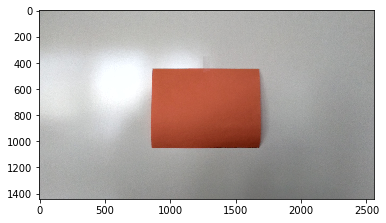

In [5]:
%matplotlib inline
import cv2; from cv2 import imread
import matplotlib.pyplot as plt
import numpy as np
from IPython import display
img = imread('CV Images/20181110_100506_HDR.jpg') # If the image file does not exist, there will be a confusing error. Make sure it exists!
#cv2.imshow(cv2.namedWindow('results'), img) # makes named window; if commented out will result in image being shown beneath code
img = cv2.cvtColor(img, cv2.COLOR_BGR2RGB) # OpenCV sees the image in a weird format. The colors will be flipped without this; this code unflips the colors.
rawImage = plt.imshow(img)

In [6]:
orange = np.uint8([[[255, 165, 0]]])
hsvOrange = cv2.cvtColor(orange, cv2.COLOR_RGB2HSV)
hsvOrange = hsvOrange[0][0]
print(hsvOrange)

[ 19 255 255]


1440 2560


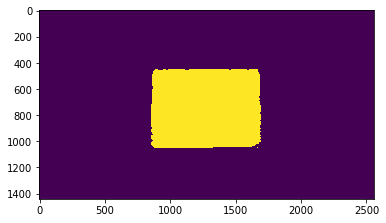

In [78]:
imgHSV = cv2.cvtColor(img, cv2.COLOR_RGB2HSV)

lowerOrange = np.array([hsvOrange[0]-40, 100, 100])
upperOrange = np.array([hsvOrange[0]+40, 255, 255])

mask = cv2.inRange(imgHSV, lowerOrange, upperOrange)
print(len(mask), len(mask[0]))
plt.imshow(mask)

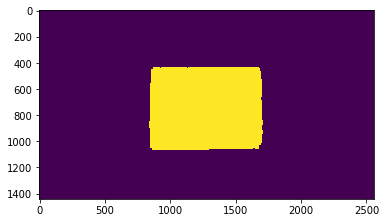

In [98]:
kernel = np.ones((5,5), np.uint8)
mask = cv2.dilate(mask, kernel, iterations=3)
plt.imshow(mask)

2369692


(925, 1692)

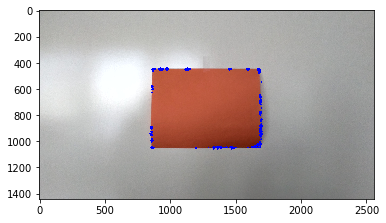

In [95]:
corners = cv2.cornerHarris(np.float32(mask), 10, 7, 0.04)
corners = cv2.dilate(corners, None)
plt.imshow(corners, cmap = 'binary')
img[corners>0.01*corners.max()] = [0, 0, 255]
plt.imshow(img)
#plt.imshow(corners.argsort()[-5:][::-1], cmap='binary')

maxIndex = corners.argmax()
print(maxIndex)
np.unravel_index(maxIndex, corners.shape)


#print([np.unique(val) for val in corners.argsort(axis=0)[-5:][::-1]])

How does the following work?
`[1] cornersFile = open('CV Images/_____.txt')`
1. The `open` function takes an image (plus the path to the image). It can also take other arguments if you want to write to the file. In this case, we only want to read the file, so nothing else needs to be put into the function.
2. The file is now an object.
`[2] 

In [16]:
cornerFile = open('CV Images/20181110_100506_HDR.txt')
cornerFileText = cornerFile.read()
print('Text:\n' + cornerFileText)
cornerFileRawCoords = cornerFileText.split('\n')
print('Raw Coordinates:\n' + str(cornerFileRawCoords))
cornerFileCoords = [pair.split(', ') for pair in cornerFileRawCoords]
print('Coordinates:\n' + str(cornerFileCoords))

Text:
868, 446
1682, 448
1682, 1048
861, 1051
Raw Coordinates:
['868, 446', '1682, 448', '1682, 1048', '861, 1051']
Coordinates:
[['868', '446'], ['1682', '448'], ['1682', '1048'], ['861', '1051']]
